In [94]:
import random
# from scipy.constants import k
from scipy.constants import pi
# from scipy.constants import e
import numpy as np
import time

random.seed()
    
N = 2


k = 1
sigma = 1
ep = 1
T = 1
m0 = 1
side = 1
side_p = side / 2
 
time = 0.01
epoches = 10

In [86]:
def Maxvellv(v, T, mo):
    return (m0 / (2 * pi * k * T)) ** (3 / 2) * np.exp(- m0 * v ** 2 / (2 * k * T))

def Maxvellv_i(T, m0, v_m, m):
    flag = 0
    while flag == 0:
        v_i = v_m[random.randint(0, len(v_m) - 1)]
        m_i = m[random.randint(0, len(m) - 1)]
        if Maxvellv(v_i, T, m0) >= m_i:
            flag += 1
            
    return v_i

def Maxvell_v2(T, m0, n1, n2, N):
    m_max = (m0 / (2 * pi * k * T)) ** (3 / 2)
    v_max = (8 * k * T / m0) ** 0.5
    dv = 2 * v_max / n1
    dm = m_max / n2
    v_m = np.arange(-v_max, v_max + dv, dv)
    m = np.arange(0, m_max + dm, dm) 
    
    v = []
    
    for i in range(N):
        v_i = []
        for j in range(3):
            v_i.append(Maxvellv_i(T, m0, v_m, m))
        v.append(v_i)
        
    return v

def socm(v, N):
    v_x = np.zeros(N)
    v_y = np.zeros(N)
    v_z = np.zeros(N)
    
    for i in range(N):
        v_x[i] += v[i][0]
        v_y[i] += v[i][1]
        v_z[i] += v[i][2]
        
    v_x0 = np.mean(v_x)
    v_x -= v_x0 * np.ones(N)

    v_y0 = np.mean(v_y)
    v_y -= v_y0 * np.ones(N)
    
    v_z0 = np.mean(v_z)
    v_z -= v_z0 * np.ones(N)
    
    for i in range(N):
        v[i][0] = v_x[i]
        v[i][1] = v_y[i]
        v[i][2] = v_z[i]
    
    return v

In [ ]:
# def Maxvell_v1(T, m0, N, n1):

#     # print(neg[random.randint(0, 1)])
#     v_max = (8 * k * T / m0) ** 0.5
#     dv = 2 * v_max / n1
#     v_maxvell = np.arange(-v_max, v_max + dv, dv)
#     res_x = []
#     res_y = []
#     res_z = []
#     for elem in v_maxvell:
#     #     print(int(Maxvellv_i(elem, T, mo) * 1e-6 * N), Maxvellv_i(elem, T, mo) * 1e-6 * N)
#         for i in range(int(Maxvellv(elem, T, m0) * dv * N)):
#             res_x.append(elem)
#             res_y.append(elem)
#             res_z.append(elem)
#     #         print(elem)
#     #     print()
#     for i in range(N - len(res_x)):
#         res_x.append(0)
#         res_y.append(0)
#         res_z.append(0)
#     #     print('1')

#     v = [[0, 0, 0] for i in range(N)] # velosity

#     # print(random.randint(0, 0))
#     # print(res_x, res_y, res_z)
#     # print(len(res_x))

#     for i in range(N):
#         v.append([res_x.pop(random.randint(0, len(res_x) - 1)), res_y.pop(random.randint(0, len(res_y) - 1)), res_z.pop(random.randint(0, len(res_z) - 1))])
#     #     print(len(res_x), len(res_y), len(res_z))
#     #     # print(res_x, res_y, res_z)
#     #     print(v_0)
#         # , neg[random.randint(0, 1)] * res_y.pop(random.randint(0, len(res_y) - 1)), neg[random.randint(0, 1)] * res_z.pop(random.randint(0, len(res_z) - 1))

#     print(v)

#     # print((2 * k * T / m0) ** 0.5)
    
#     return v

In [87]:
def L(x, y, z, x_i, y_i, z_i):
    lenth_v = [x - x_i, y - y_i, z - z_i]
    lenth = (lenth_v[0] ** 2 + lenth_v[1] ** 2 + lenth_v[2] ** 2) ** (1 / 2)
    
    return (lenth, lenth_v)

In [88]:
def LocationIn(N, epoches):
    history_x = [[0 for i in range(epoches + 1)] for i in range(N)]
    history_y = [[0 for i in range(epoches + 1)] for i in range(N)]
    history_z = [[0 for i in range(epoches + 1)] for i in range(N)]


    for i in range(N):
        history_x[i][0] = 10 ** -3 * random.randint(-int(side_p * 10 ** 3), int(side_p * 10 ** 3))
        history_y[i][0] = 10 ** -3 * random.randint(-int(side_p * 10 ** 3), int(side_p * 10 ** 3))
        history_z[i][0] = 10 ** -3 * random.randint(-int(side_p * 10 ** 3), int(side_p * 10 ** 3))
    
    return (history_x, history_y, history_z)

def Energy(epoch):
    E_p = 0
    E_k = 0
    
    for n in range(N):
        x, y, z = history_x[n][epoch], history_y[n][epoch], history_z[n][epoch]
        for i in range(N):
            if i != n:
                x_i, y_i, z_i = history_x[i][epoch], history_y[i][epoch], history_z[i][epoch]

                lenth = sorted([L(x, y, z, x_i, y_i, z_i), L(x, y, z, x_i + side, y_i, z_i), L(x, y, z, x_i - side, y_i, z_i), L(x, y, z, x_i, y_i + side, z_i), L(x, y, z, x_i, y_i - side, z_i), L(x, y, z, x_i, y_i, z_i + side), L(x, y, z, x_i, y_i, z_i - side)], key=lambda x: x[0])[0]
#                 if lenth[0] == 0:
#                     print(lenth[1], n, i)
                E_p += 4 * ep * ((sigma / lenth[0]) ** 12 - (sigma / lenth[0]) ** 6)
            else:
                E_k += m0 / 2 * (v[i][0]**2 + v[i][1]**2 + v[i][2]**2)
    
    return E_k + E_p / 2



def Momentum(v):
    p_x = 0
    p_y = 0
    p_z = 0
    
    for i in range(N):
        p_x += v[i][0]
        p_y += v[i][1]
        p_z += v[i][1]
    
    p_x *= m0
    p_y *= m0
    p_z *= m0
    
    return [p_x, p_y, p_z]


def EnegyMomentumIn(epoches):
    history_E = [0 for i in range(epoches + 1)]
    history_p = [[0 for i in range(epoches + 1)] for i in range(3)]
    
    history_E[0] = Energy(0)
    p_i = Momentum(v)
    history_p[0][0] = p_i[0]
    history_p[1][0] = p_i[1]
    history_p[2][0] = p_i[2]

    out = open('C:/Users/Xiaomi/PhysModel/Gas/E.txt', 'a')
    out.write("{} {}\n".format(0, history_E[0]))
    out.close()
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/p.txt', 'a')
    out.write("{} {} {} {}\n".format(0, history_p[0][0], history_p[1][0], history_p[2][0]))
    out.close()
    
    return (history_E, history_p)
    

def EnegyMomentum(epoch):
    history_E[epoch] = Energy(epoch)
    p_i = Momentum(v)
    history_p[0][epoch] = p_i[0]
    history_p[1][epoch] = p_i[1]
    history_p[2][epoch] = p_i[2]
    
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/E.txt', 'a')
    out.write("{} {}\n".format(epoch, history_E[epoch]))
    out.close()
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/p.txt', 'a')
    out.write("{} {} {} {}\n".format(epoch, history_p[0][epoch], history_p[1][epoch], history_p[2][epoch]))
    out.close()

def forovito(epoch, N):
    out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/{}.xyz'.format(epoch), 'a')
    out.write("{}\n".format(N))
    out.write("Lattice=\"1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0\" Properties=pos:R:3:velo:R:3 Time=0\n")
    for i in range(N):
        out.write("{} {} {} {} {} {}\n".format(history_x[i][epoch], history_y[i][epoch], history_z[i][epoch], v[i][0], v[i][1], v[i][2]))
    out.close()

In [15]:
print("{}  {}".format(1, 2))
print(k)

1  2
1.380649e-23


In [89]:
v = Maxvell_v2(T, m0, 1000, 1000, N)
# print(v)
v = socm(v, N)
# print(v)

history_x, history_y, history_z = LocationIn(N, epoches)

history_E, history_p = EnegyMomentumIn(epoches)

forovito(0, N)

# print(history_E, history_p, v)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# v = np.arange(0.000001, 0.00003, 0.000001)
# res = []
# for elem in v:
#     res.append((int(Maxvellv(elem, T, mo) * 0.000001 * N), elem))
# # res = np.array(res)
# # plt.xlabel('$x$')
# # plt.ylabel('$y$')
# # plt.grid(True)
# # plt.plot(v, res)
# print(v, res)
# sum = 0
# for elem in res:
#     sum += elem[0]
# print(sum)

NameError: ignored

In [90]:
def acceleration(n, epoch):
    a = [0, 0, 0]
    x, y, z = history_x[n][epoch - 1], history_y[n][epoch - 1], history_z[n][epoch - 1]
    for i in range(N):
        if i != n:
            x_i, y_i, z_i = history_x[i][epoch - 1], history_y[i][epoch - 1], history_z[i][epoch - 1]
 
            lenth = sorted([L(x, y, z, x_i, y_i, z_i), L(x, y, z, x_i + side, y_i, z_i), L(x, y, z, x_i - side, y_i, z_i), L(x, y, z, x_i, y_i + side, z_i), L(x, y, z, x_i, y_i - side, z_i), L(x, y, z, x_i, y_i, z_i + side), L(x, y, z, x_i, y_i, z_i - side)], key=lambda x: x[0])[0]
            # lenth = L(x, y, z, x_i, y_i, z_i)

            # print(lenth, lenth[0])
            a_i = - 24 * ep * sigma ** 6 * (lenth[0] ** -7 - 2 * sigma ** 6 * lenth[0] ** -13) / m0
            a_i_x = a_i * lenth[1][0] / lenth[0]
            a_i_y = a_i * lenth[1][1] / lenth[0]
            a_i_z = a_i * lenth[1][2] / lenth[0]
            a[0] += a_i_x
            a[1] += a_i_y
            a[2] += a_i_z
       
    return a
 
 
# print(acceleration(0, 1))

In [91]:
def step(epoch):
#     start_time = time.clock()
    for n in range(N):
        x, y, z = history_x[n][epoch - 1], history_y[n][epoch - 1], history_z[n][epoch - 1]
 
        a = acceleration(n, epoch)
        # print('1 ---- ', a, x, y, n, i)

        print(a)
        
        # print('2 ---- ', v, v[n])

        x += v[n][0] * time + a[0] * time ** 2 / 2
        y += v[n][1] * time + a[1] * time ** 2 / 2
        z += v[n][2] * time + a[2] * time ** 2 / 2
        
        
        # print('2 ---- ', v, v[n])
        print(v)
        v[n][0] += a[0] * time
        v[n][1] += a[1] * time
        v[n][2] += a[2] * time
        print(v)
        print()
        
        if abs(x) <= side_p:
            history_x[n][epoch] = x
#             print('1x -- ', epoch, n, history_x[n][epoch])
        elif x < 0:
            history_x[n][epoch] = x + side
#             print('2x -- ', epoch, n, x, history_x[n][epoch])
        else:
            history_x[n][epoch] = x - side
#             print('3x -- ', epoch, n, x, history_x[n][epoch])

        if abs(y) <= side_p:
            history_y[n][epoch] = y
#             print('1y -- ', epoch, n, history_y[n][epoch])
        elif y < 0:
            history_y[n][epoch] = y + side
#             print('2y -- ', epoch, n, y, history_y[n][epoch])
        else:
            history_y[n][epoch] = y - side
#             print('3y -- ', epoch, n, y, history_y[n][epoch])

        if abs(z) <= side_p:
            history_z[n][epoch] = z
#             print('1z -- ', epoch, n, history_z[n][epoch])
        elif z < 0:
            history_z[n][epoch] = z + side
#             print('2z -- ', epoch, n, z, history_z[n][epoch])
        else:
            history_z[n][epoch] = z - side
#             print('3z -- ', epoch, n, z, history_z[n][epoch])
        
#         print(history_x[1][:2], history_y[1][:2], history_z[1][:2])
#         print(history_x[2][:2], history_y[2][:2], history_z[2][:2])
    
    
    EnegyMomentum(epoch)

    forovito(epoch, N)
    
#     print("{} ---- {}".format(epoch, time.clock() - start_time))

        # print('3 ---- ', history_x, history_y, v, sep='\n')
        # print()

# step(1)

In [92]:
for i in range(1, epoches + 1, 1):
#     print(v)
    step(i)
#     print(v)
#     print()

# print(history_x, history_y, v, sep='\n')

[-496.86928832854977, 410.7220737146679, -273.23459988645294]
[[-0.20647518010647925, -0.24607315985292733, 0.43274935008618254], [0.20647518010647925, 0.24607315985292733, -0.43274935008618254]]
[[-5.175168063391977, 3.8611475772937514, -2.299596648778347], [0.20647518010647925, 0.24607315985292733, -0.43274935008618254]]

[496.86928832854977, -410.7220737146679, 273.23459988645294]
[[-5.175168063391977, 3.8611475772937514, -2.299596648778347], [0.20647518010647925, 0.24607315985292733, -0.43274935008618254]]
[[-5.175168063391977, 3.8611475772937514, -2.299596648778347], [5.175168063391977, -3.8611475772937514, 2.299596648778347]]

[-1604.7204977229444, 1352.3558724682296, -916.3565603080132]
[[-5.175168063391977, 3.8611475772937514, -2.299596648778347], [5.175168063391977, -3.8611475772937514, 2.299596648778347]]
[[-21.22237304062142, 17.384706301976045, -11.463162251858478], [5.175168063391977, -3.8611475772937514, 2.299596648778347]]

[1604.7204977229444, -1352.3558724682296, 916.3

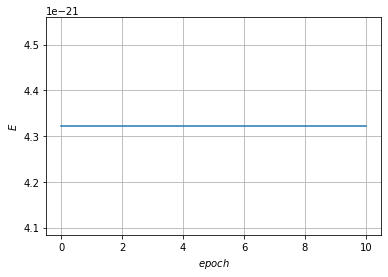

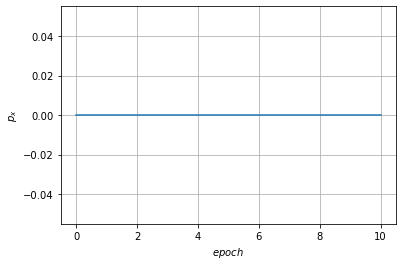

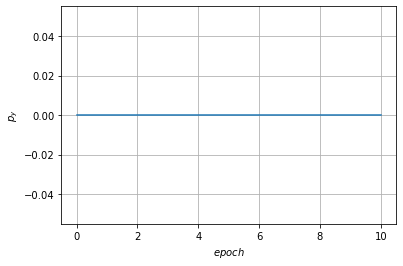

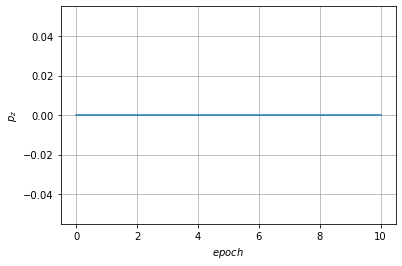

In [17]:
import matplotlib.pyplot as plt
import numpy as np
epoches_ar = np.arange(0, epoches + 1, 1)
plt.xlabel('$epoch$')
plt.ylabel('$E$')
plt.grid(True)
plt.plot(epoches_ar, history_E)
plt.show()
plt.xlabel('$epoch$')
plt.ylabel('$p_x$')
plt.grid(True)
plt.plot(epoches_ar, history_p[0])
plt.show()
plt.xlabel('$epoch$')
plt.ylabel('$p_y$')
plt.grid(True)
plt.plot(epoches_ar, history_p[1])
plt.show()
plt.xlabel('$epoch$')
plt.ylabel('$p_z$')
plt.grid(True)
plt.plot(epoches_ar, history_p[2])

In [93]:
print(history_E)
print(v)


[39.86782322563328, 175.43344323745492, 556661.1032229975, 32122388964.211845, 32122388964.211845, 32122388964.211845, 32122388964.211845, 32122388964.211845, 32122388964.211845, 32122388964.211845, 32122388964.211845]
[[-121773.41862457183, 107432.2120729966, -75841.56703153827], [121773.41862457183, -107432.2120729966, 75841.56703153827]]


In [35]:
# print(history_x[1][:2], history_y[1][:2], history_z[1][:2])
# print(history_x[2][:2], history_y[2][:2], history_z[2][:2])
# print(history_x, history_y, history_z, sep='\n')

[173, 0] [-291, 0] [-402, 0]
[48, 0] [37, 0] [109, 0]
[[-318, -320.2539376777624, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [173, 0, 0, 0, 0, 0,

In [19]:
# # import matplotlib.pyplot as plt
# # import numpy as np
# # plt.xlabel('$x$')
# # plt.ylabel('$y$')
# # plt.grid(True)
# # plt.plot(history_x[0], history_y[0], history_x[1], history_y[1])

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # ax.scatter(history_x[0], history_y[0], history_z[0], c='g', marker='o')
# ax.scatter(history_x[1][:1700], history_y[1][:1700], history_z[1][:1700], c='b', marker='o')
# # ax.scatter(history_x[2], history_y[2], history_z[2], c='y', marker='o')
# # ax.scatter(history_x[3], history_y[3], history_z[3], c='r', marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()